В данной задаче рассмотрим визуализацию категориальных признаков.

В нашем распоряжении кредитные заявки с характеристиками клиента и результатом одобрения заявки - Флаг

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Test_OOA.xlsx', index_col = 0)

In [3]:
df

,Тип точки продаж,Кредит_1,Кредит_2,Kредит_3,Клиент_1,Клиент_2,Клиент_3,Клиент_4,Клиент_5,Клиент_6,Клиент_7,Флаг
ID заявки,,,,,,,,,,,,
1,2,10,5,5,1,2,0,7,1,12,16,0
2,7,3,1,6,2,3,1,7,4,10,15,0
3,7,10,1,6,2,4,1,7,4,11,20,0
4,7,4,1,10,1,7,1,7,4,8,19,0
5,7,6,1,10,2,6,1,7,4,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74401,7,4,3,10,2,3,0,7,2,11,1,0
74402,4,16,1,11,2,5,0,2,2,17,12,0
74403,2,8,2,6,1,2,0,4,4,8,13,0


Составим матрицу зависимостей

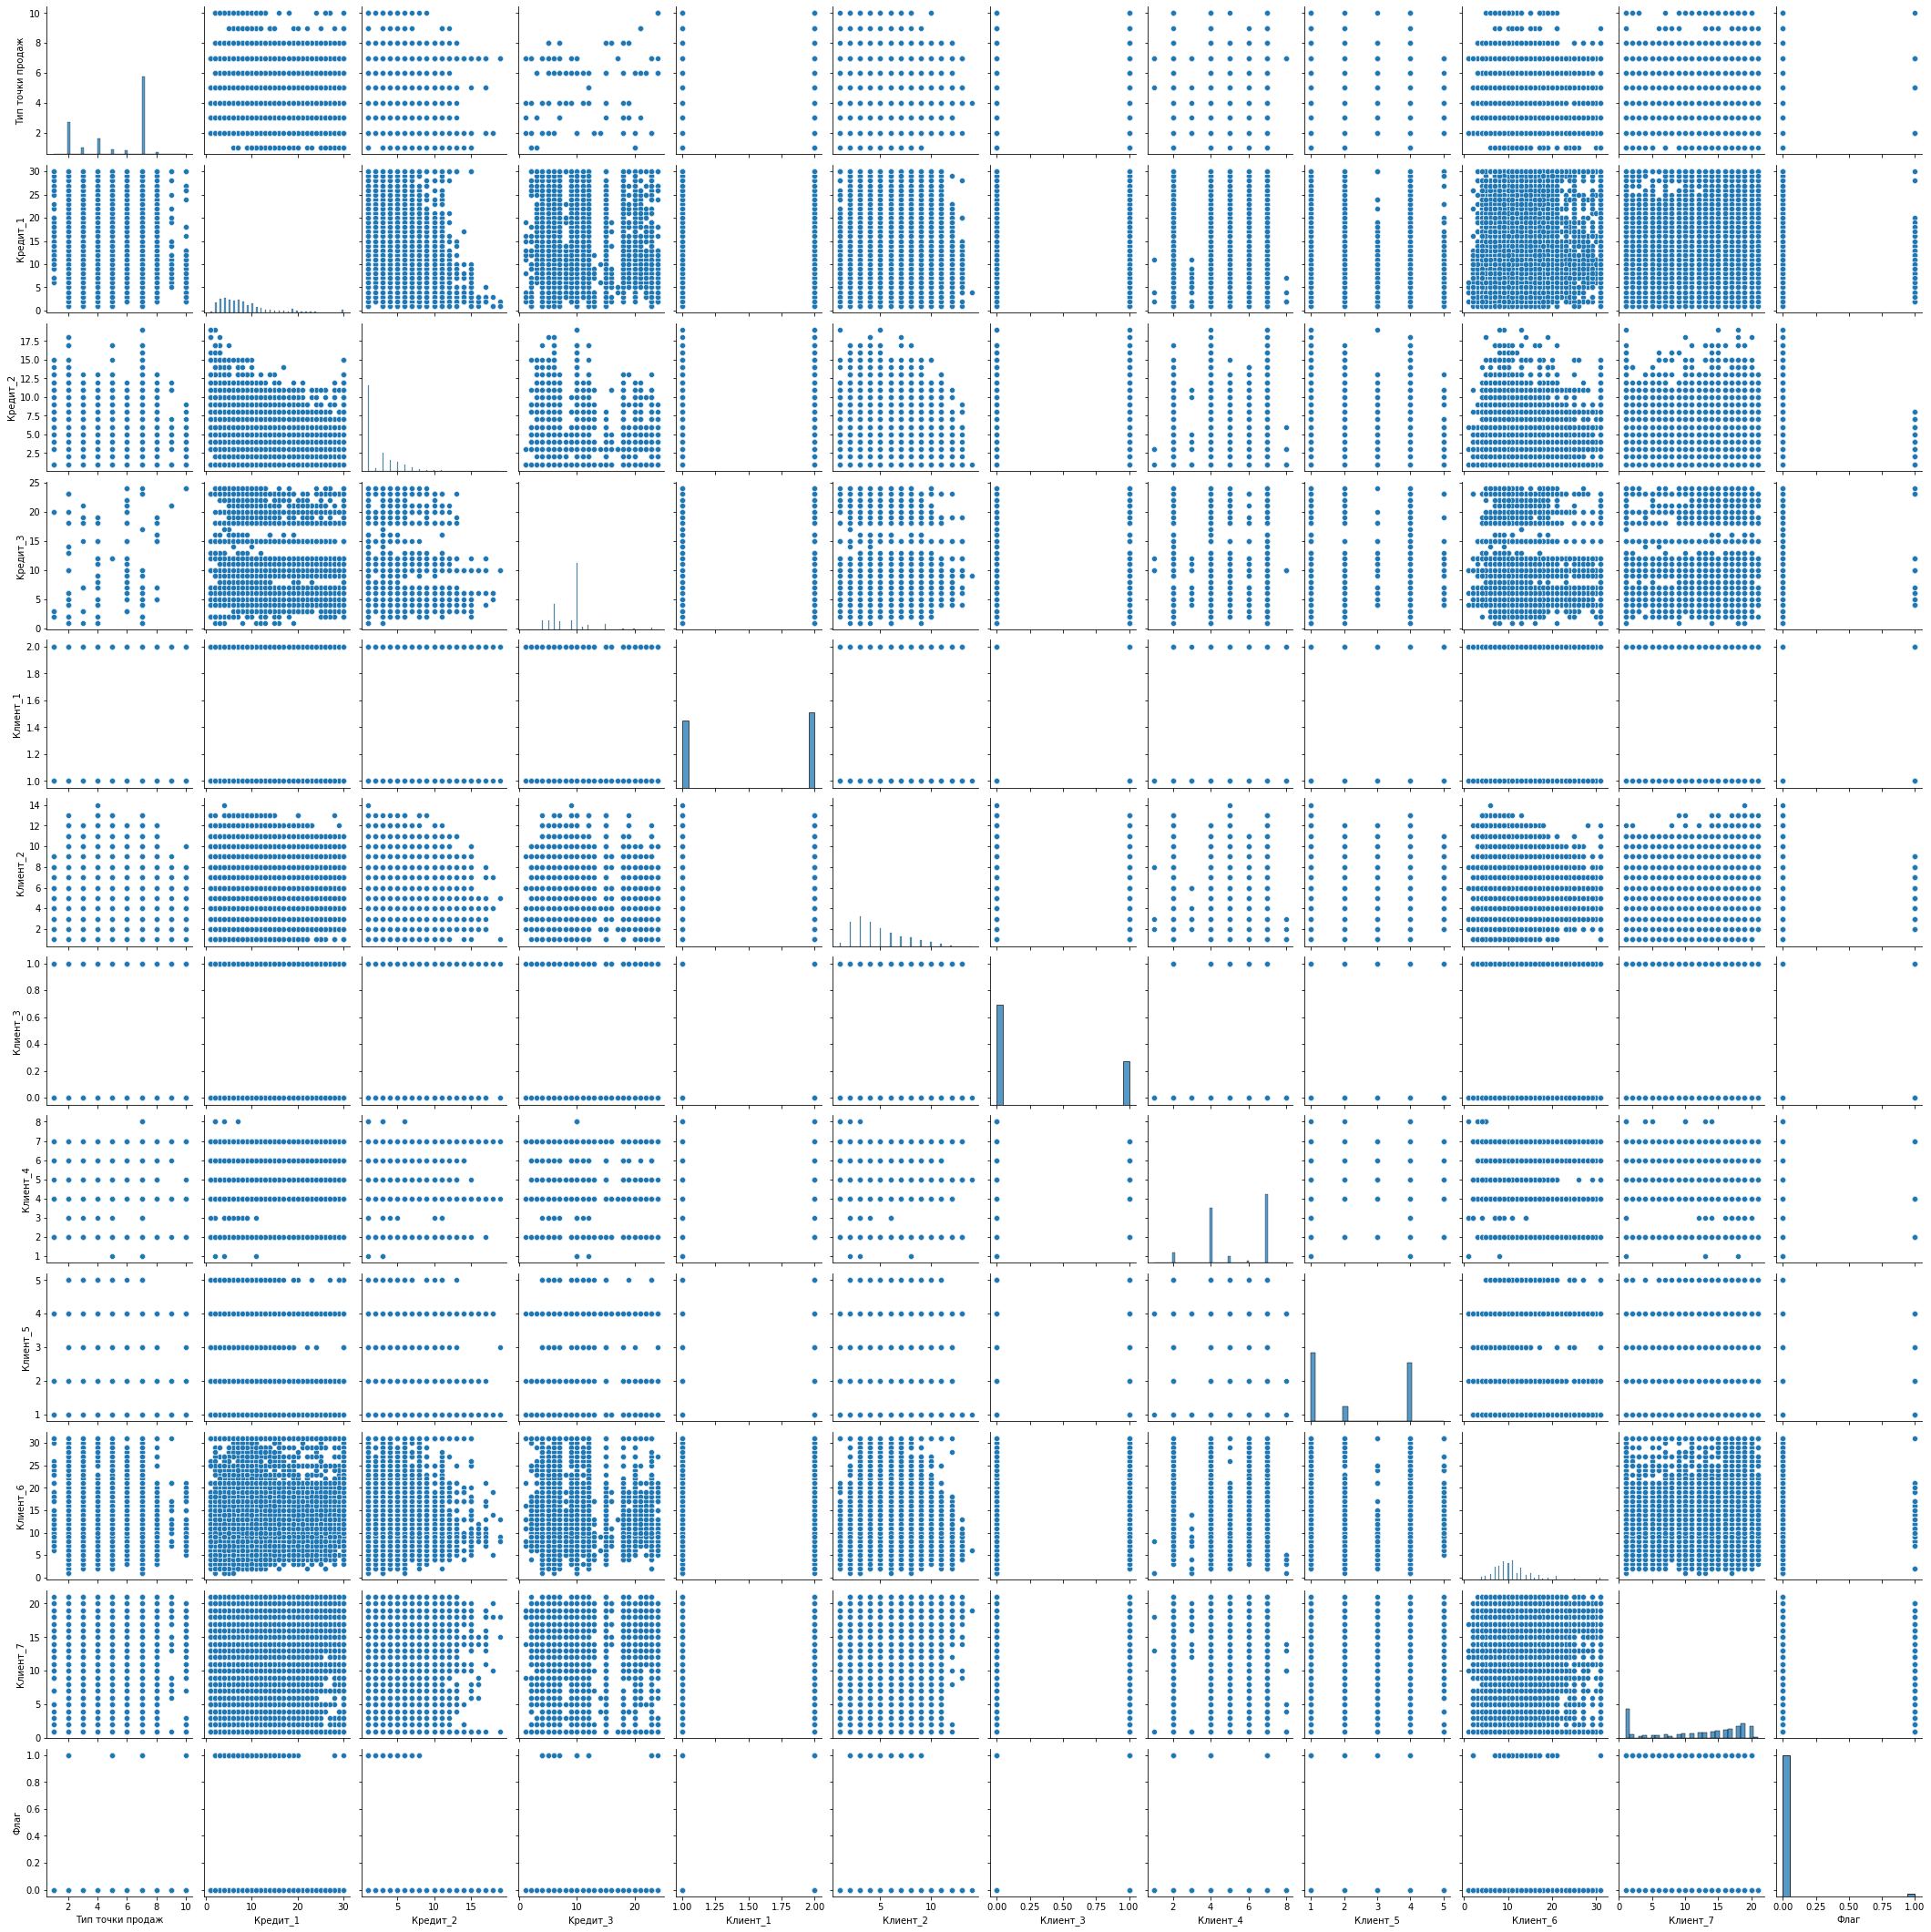

In [4]:
sns.pairplot(data = df)

Как видим, **все** признаки не имеют никакой закономерной связи между собой, за исключением **Флага* заявки.

Рассмотрим расспределения каждого признака в отдельности

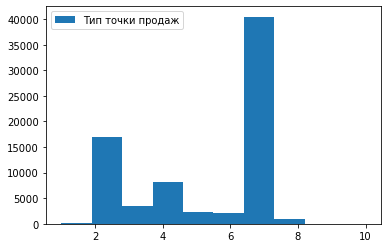

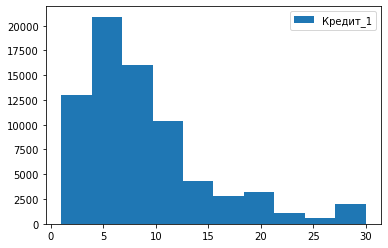

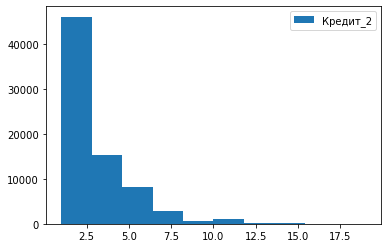

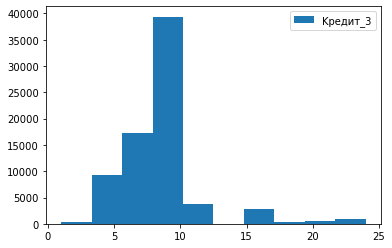

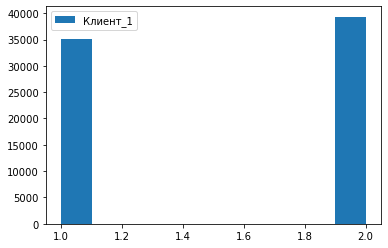

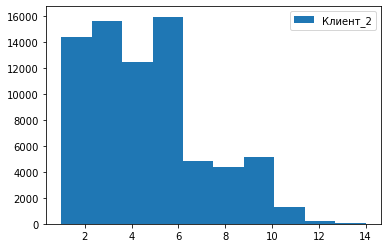

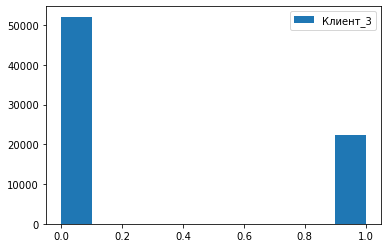

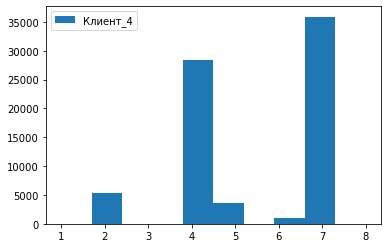

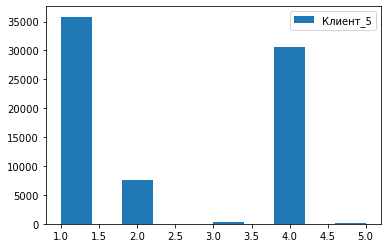

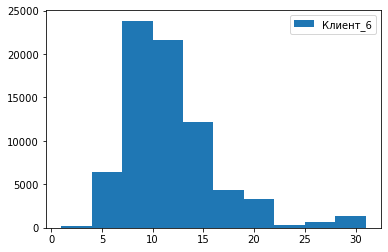

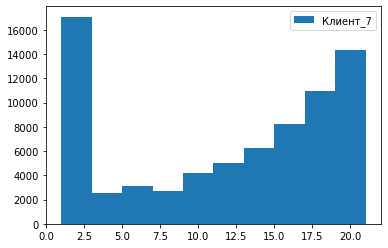

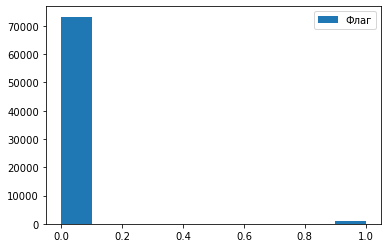

In [5]:
cols = df.columns.tolist()
for col in cols:
    plt.hist(df[col], label = col, bins = 10)
    plt.legend()
    plt.show()

На основании распределений можно увидеть, что признак 'Клиент_1' и 'Клиент_3' имеют бинарное значение (0; 1) и (1; 2) соответственно.

In [6]:
df[['Клиент_1', 'Клиент_3']].describe()

,Клиент_1,Клиент_3
count,74405.000000,74405.000000
mean,1.528580,0.299819
std,0.499186,0.458181
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,1.000000
max,2.000000,1.000000


Рассмотрим распределения по положительным заявкам

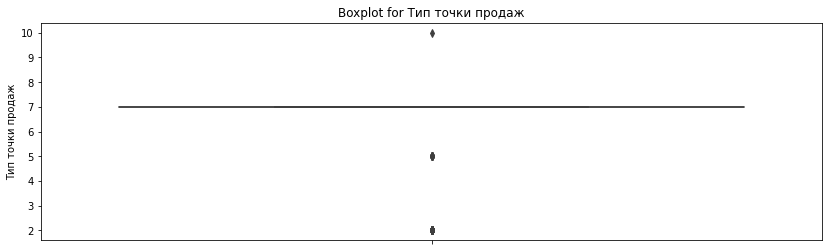

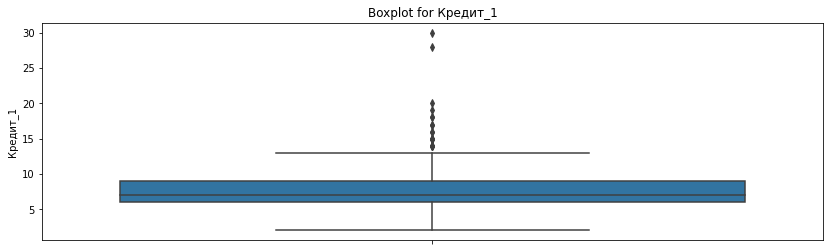

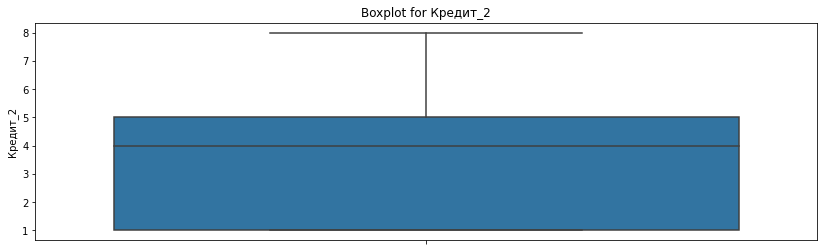

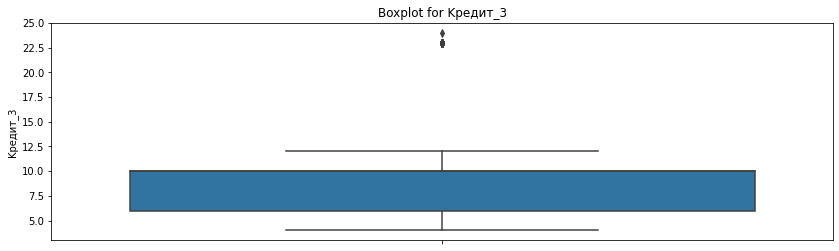

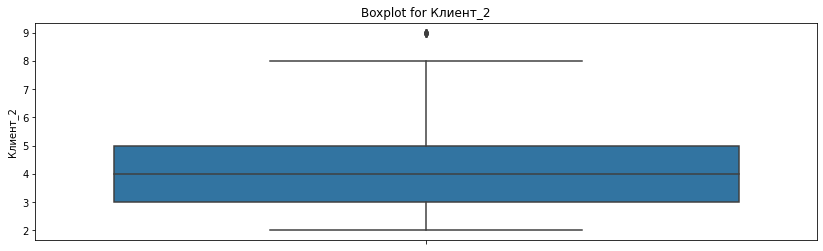

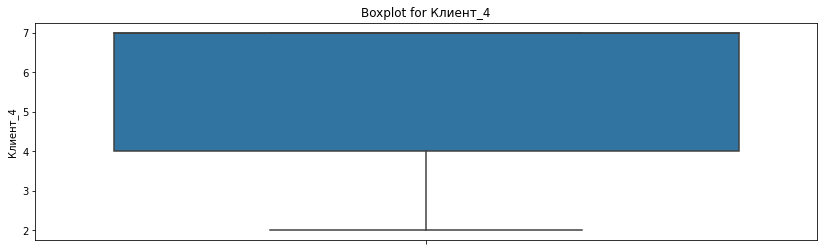

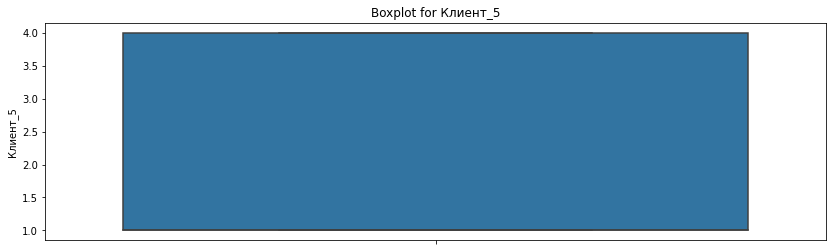

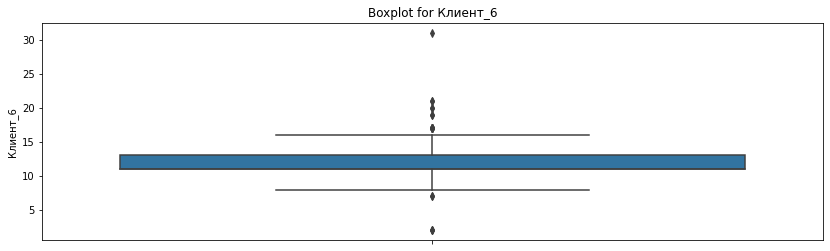

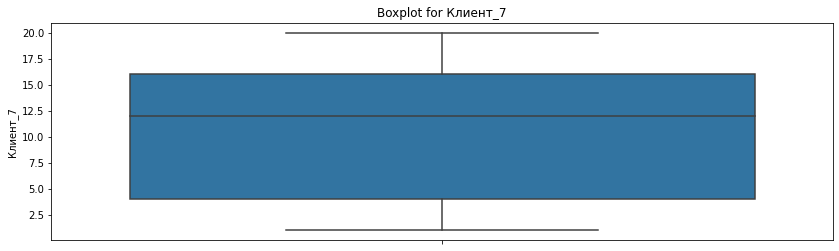

In [7]:
def boxplot(col):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(y=col, data=df[df['Флаг'] == 1],ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()
    
    
for col in cols:
    if(col in ('Клиент_1', 'Клиент_3', 'Флаг')):
        continue
    boxplot(col)

Рассмотрим распределения по отрицательным заявкам

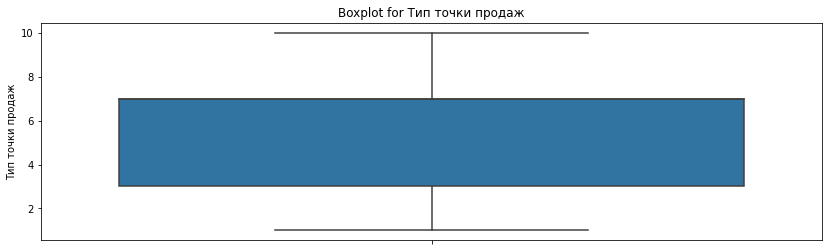

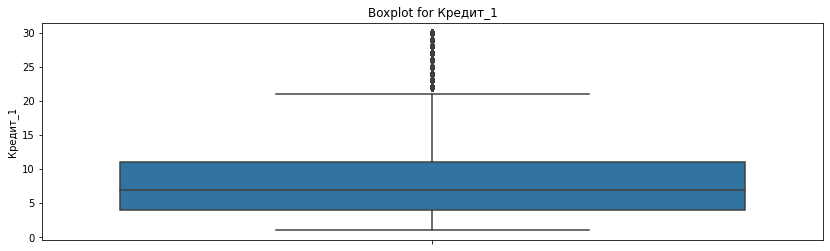

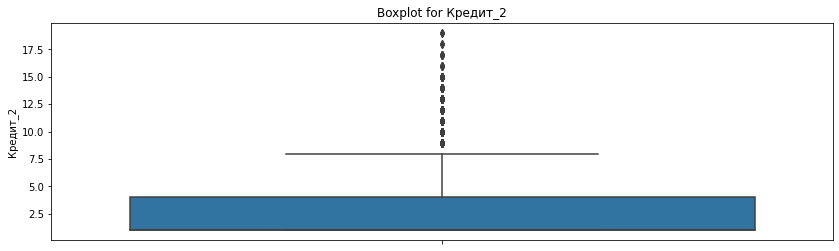

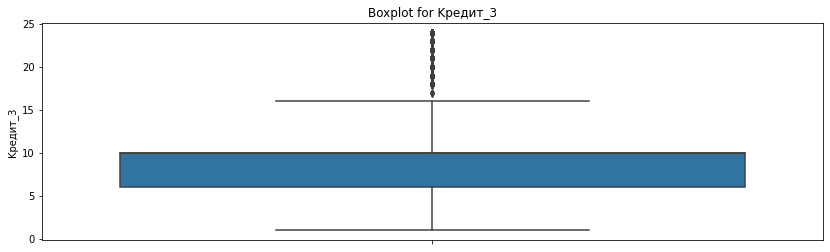

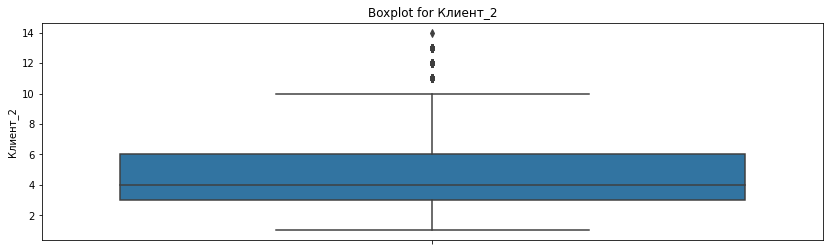

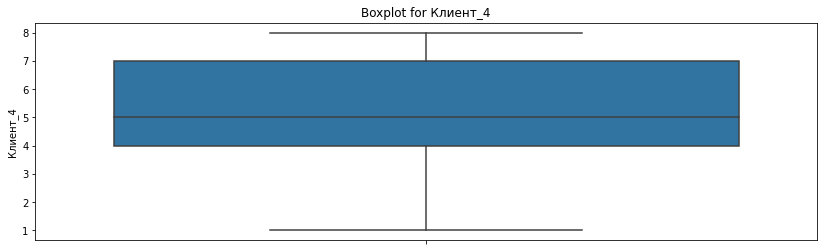

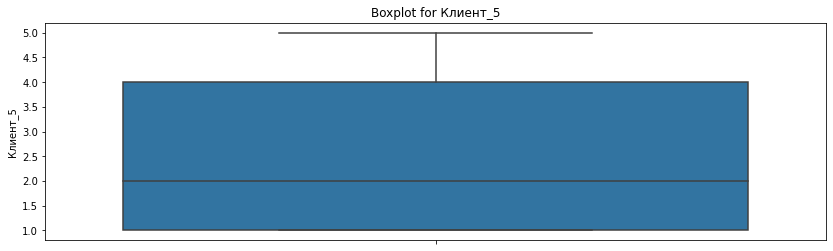

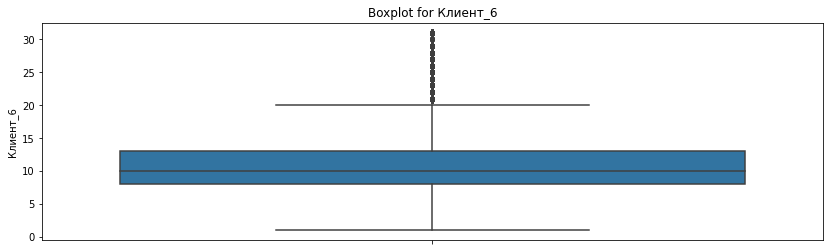

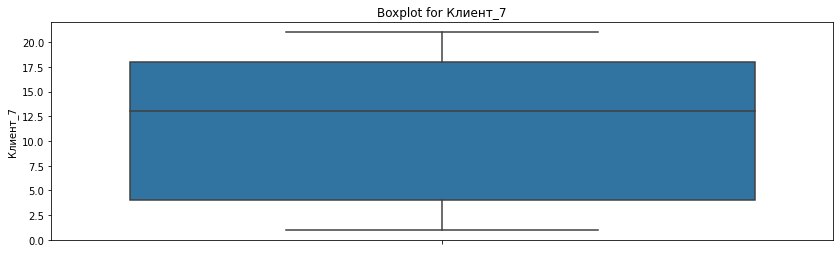

In [8]:
def boxplot(col):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(y=col, data=df[df['Флаг'] == 0],ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()
    
    
for col in cols:
    if(col in ('Клиент_1', 'Клиент_3', 'Флаг')):
        continue
    boxplot(col)

Рассмотрим корреляционную матрицу

<AxesSubplot:>

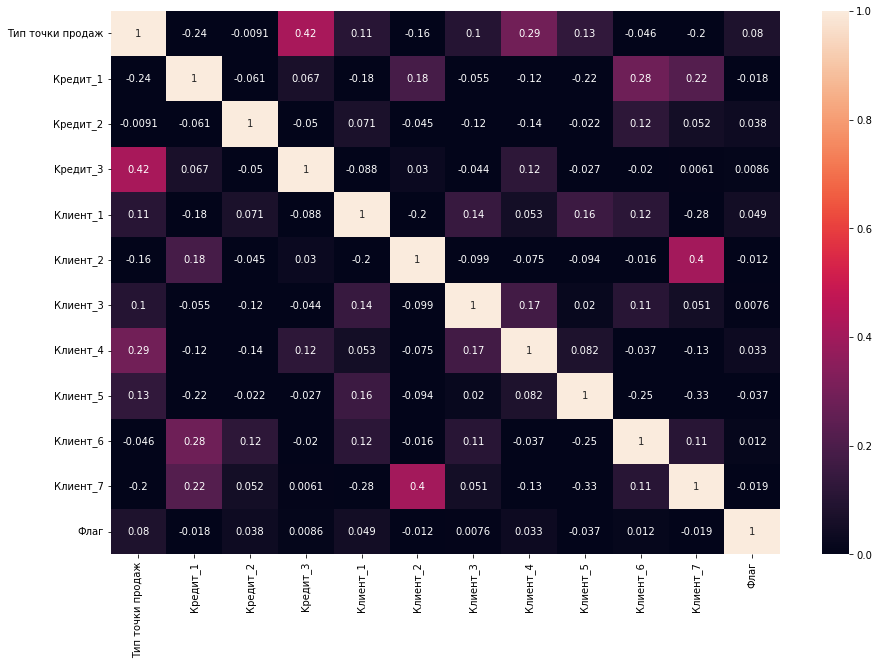

In [9]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.corr(), vmin=0, vmax=1, annot = True)

Как и было сказано ранее, признаки не коррелированны между собой - значение корреляции меньше 0.5

Рассмотрим матрицу корреляции отдельно для каждого типа заявки

In [10]:
df_true = df[df['Флаг' == 1]].drop(['Флаг'], axis = 0)
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_true.corr(), vmin=0, vmax=1, annot = True)

KeyError: False